In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [19]:
data = pd.read_csv('dataset/Eth_dataset.csv')
data.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,26.Nov.18,116.34,118.20,104.89,108.34,"2,139,490,000","11,206,775,318"
1,27.Nov.18,107.91,111.84,102.45,110.01,"2,320,010,000","11,382,216,773"
2,28.Nov.18,110.20,126.05,110.20,122.44,"2,673,470,000","12,670,491,119"
3,29.Nov.18,122.72,123.23,115.30,117.54,"2,196,099,151","12,166,285,642"
4,30.Nov.18,117.73,119.42,111.74,113.17,"2,020,748,396","11,716,096,076"


In [20]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [21]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [22]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((283, 50, 1), (31, 50, 1))

In [23]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

W1126 13:27:30.759195 4683111872 deprecation_wrapper.py:119] From /Users/macbookpro/miniconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 283 samples, validate on 31 samples
Epoch 1/20
283/283 [==============================] - 2s 6ms/step - loss: 0.0219 - val_loss: 0.0036
Epoch 2/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0101 - val_loss: 0.0038
Epoch 3/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 4/20
283/283 [==============================] - 1s 5ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 5/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0069 - val_loss: 0.0028
Epoch 6/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0060 - val_loss: 0.0022
Epoch 7/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0053 - val_loss: 0.0023
Epoch 8/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 9/20
283/283 [==============================] - 1s 4ms/step - loss: 0.0046 - val_loss: 0.0022
Epoch 10/20
283/283 [==============================] - 

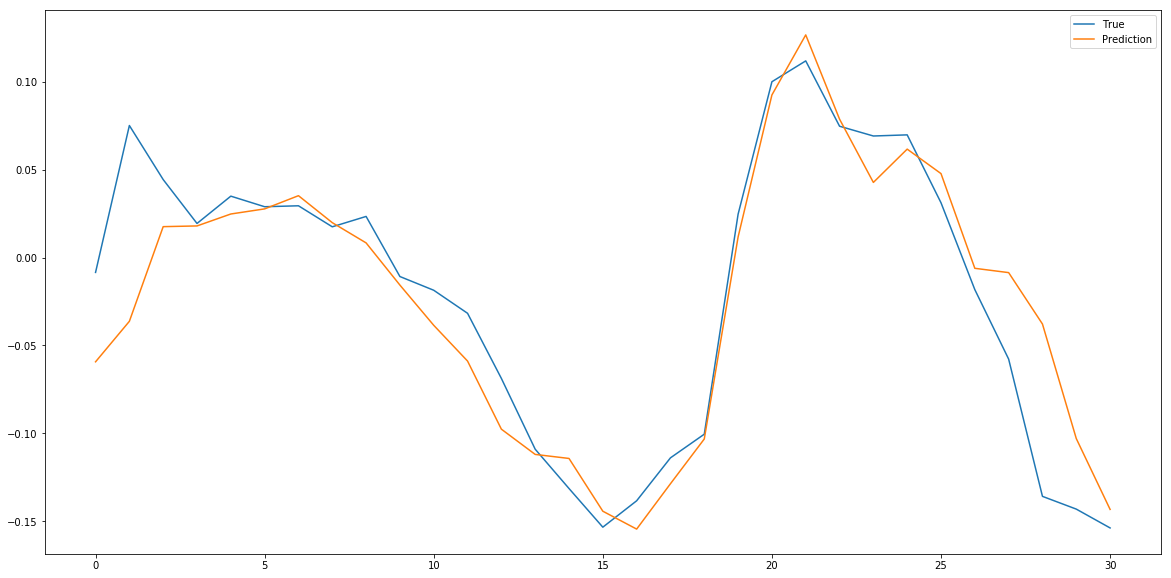

In [25]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()